<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/CNN_Classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import fashion_mnist

#Dataset:

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

#Preprocessing

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

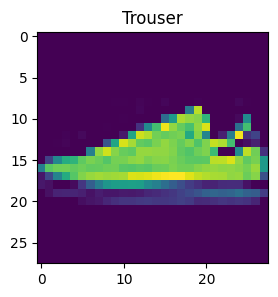

In [ ]:
# Display the image and the label:
class_labels = ["Dress", "T-shirt/top", "Trouser", "Coat", "Sandal", "Shirt", "Bag", "Ankle boot", "Sneaker"," Pullover"]
index = 6
plt.figure(figsize= (3,3))
plt.imshow(X_train[index])
plt.title(class_labels[Y_train[index][0]])
plt.show()

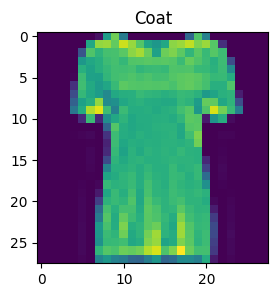

In [ ]:
# Display the image in the labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
index = 10
plt.figure(figsize=(3,3))
plt.imshow(X_train[index])
plt.title(class_labels[Y_train[index][0]])
plt.show()

In [ ]:
# Normlizing:
X_train = X_train/255
X_test = X_test/255

#Onehot encoding

In [ ]:
Y_train_en = to_categorical(Y_train, 10)
Y_test_en = to_categorical(Y_test, 10)

In [ ]:
Y_test_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# CNN Implementation:

In [ ]:
model = Sequential()

model.add(Conv2D(32,(4,4), input_shape= (32,32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Conv2D(32,(4,4), input_shape= (32,32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size= (2,2)))

# Flatten
model.add(Flatten())

# hidden layer:
model.add(Dense(128, activation = "relu"))

# Output layer:
model.add(Dense(10, activation= "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics= ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1